# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [31]:
# Was using this cell to test out exactly how I would extract the data needed in the next part
url = "http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&q="
city_url = requests.get(url + city).json()
city_url

{'coord': {'lon': -130.1015, 'lat': -25.066},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 294.93,
  'feels_like': 295.3,
  'temp_min': 294.93,
  'temp_max': 294.93,
  'pressure': 1020,
  'humidity': 82,
  'sea_level': 1020,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 11.05, 'deg': 94, 'gust': 11.65},
 'rain': {'1h': 0.3},
 'clouds': {'all': 100},
 'dt': 1700947858,
 'sys': {'country': 'PN', 'sunrise': 1700919765, 'sunset': 1700968344},
 'timezone': -28800,
 'id': 4030723,
 'name': 'Adamstown',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(url + city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | undurkhaan
Processing Record 3 of Set 1 | songea
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | newman
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | durant
Processing Record 9 of Set 1 | nahiyat ash shinafiyah
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | poronaysk
Processing Record 12 of Set 1 | mazagao
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | mugia
Processing Record 16 of Set 1 | hayvoron
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | constitucion
Processing Record 19 of Set 1 | saipan
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | daoukro
Processing Record 22 of Set 1 | hamilton
Processing Record 2

Processing Record 41 of Set 4 | montemor-o-novo
Processing Record 42 of Set 4 | cristalina
Processing Record 43 of Set 4 | ronne
Processing Record 44 of Set 4 | lima
Processing Record 45 of Set 4 | tecchiena
Processing Record 46 of Set 4 | kone
Processing Record 47 of Set 4 | christchurch
Processing Record 48 of Set 4 | eyl
Processing Record 49 of Set 4 | fort bragg
Processing Record 0 of Set 5 | thongwa
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | park city
Processing Record 3 of Set 5 | miranda do douro
Processing Record 4 of Set 5 | trevelin
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | pariaman
Processing Record 7 of Set 5 | moose jaw
Processing Record 8 of Set 5 | muynoq
Processing Record 9 of Set 5 | konstantinovka
Processing Record 10 of Set 5 | caussade
Processing Record 11 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 12 of Set 5 | altamont
Processing Record 13 of Set 5 | i-n-salah
Processing Record 14 

Processing Record 32 of Set 8 | north bend
Processing Record 33 of Set 8 | flin flon
Processing Record 34 of Set 8 | puerto deseado
Processing Record 35 of Set 8 | hammerfest
Processing Record 36 of Set 8 | nkhata bay
Processing Record 37 of Set 8 | cockburn town
Processing Record 38 of Set 8 | morehead city
Processing Record 39 of Set 8 | kerikeri
Processing Record 40 of Set 8 | victoria
Processing Record 41 of Set 8 | bignona
Processing Record 42 of Set 8 | viljoenskroon
Processing Record 43 of Set 8 | codrington
Processing Record 44 of Set 8 | upington
Processing Record 45 of Set 8 | dzuunmod
Processing Record 46 of Set 8 | hayma'
City not found. Skipping...
Processing Record 47 of Set 8 | weno
Processing Record 48 of Set 8 | kristiansund
Processing Record 49 of Set 8 | manato
City not found. Skipping...
Processing Record 0 of Set 9 | ilinge
Processing Record 1 of Set 9 | kidal
Processing Record 2 of Set 9 | talodi
Processing Record 3 of Set 9 | sao francisco
Processing Record 4 of 

Processing Record 19 of Set 12 | nuku'alofa
Processing Record 20 of Set 12 | grootfontein
Processing Record 21 of Set 12 | ulsteinvik
Processing Record 22 of Set 12 | pailon
Processing Record 23 of Set 12 | aginskoye
Processing Record 24 of Set 12 | phuntsholing
Processing Record 25 of Set 12 | lazaro cardenas
Processing Record 26 of Set 12 | lanzhou
Processing Record 27 of Set 12 | aral
Processing Record 28 of Set 12 | san julian
Processing Record 29 of Set 12 | huilong
Processing Record 30 of Set 12 | sassandra
Processing Record 31 of Set 12 | nagqu
Processing Record 32 of Set 12 | praia
Processing Record 33 of Set 12 | morigaon
Processing Record 34 of Set 12 | mawu
Processing Record 35 of Set 12 | abu jibeha
Processing Record 36 of Set 12 | the pas
Processing Record 37 of Set 12 | wenchang
Processing Record 38 of Set 12 | acarau
Processing Record 39 of Set 12 | wa
City not found. Skipping...
Processing Record 40 of Set 12 | tchibanga
Processing Record 41 of Set 12 | antalaha
Process

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.6000,73.0833,27.21,77,71,1.73,MV,1700949064
1,undurkhaan,47.3194,110.6556,-12.89,89,100,2.26,MN,1700949064
2,songea,-10.6833,35.6500,19.30,85,100,1.99,TZ,1700949064
3,grytviken,-54.2811,-36.5092,0.34,77,23,4.14,GS,1700949064
4,newman,37.3138,-121.0208,16.80,38,0,2.68,US,1700949065


In [39]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.21,77,71,1.73,MV,1700949064
1,undurkhaan,47.3194,110.6556,-12.89,89,100,2.26,MN,1700949064
2,songea,-10.6833,35.6500,19.30,85,100,1.99,TZ,1700949064
3,grytviken,-54.2811,-36.5092,0.34,77,23,4.14,GS,1700949064
4,newman,37.3138,-121.0208,16.80,38,0,2.68,US,1700949065


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

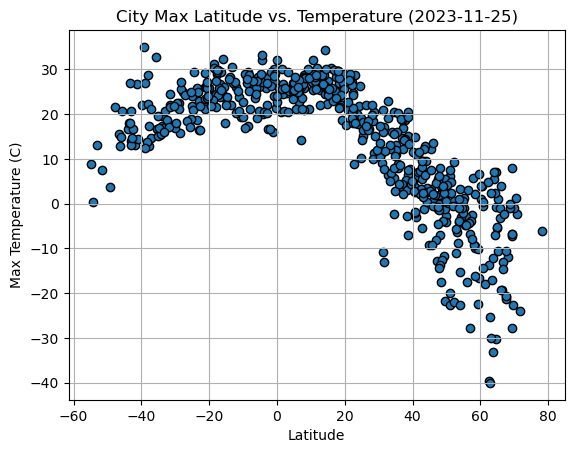

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-11-25)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

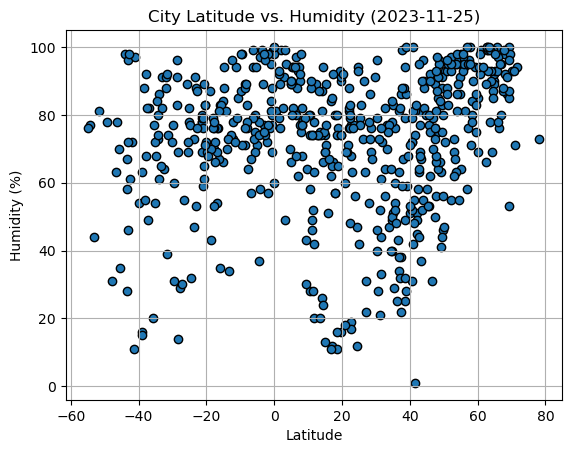

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-11-25)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

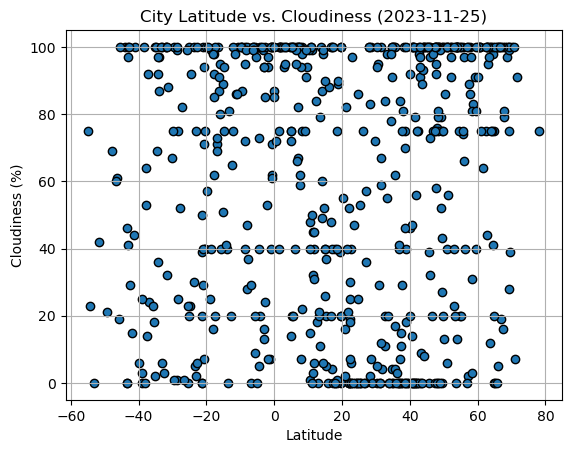

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-25)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

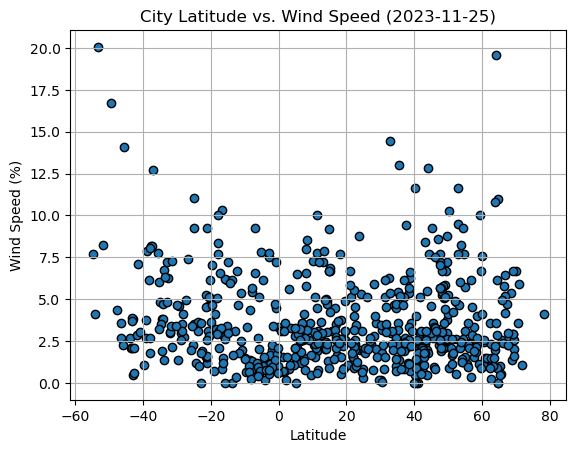

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-25)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Wasn't quite sure how to accomplish this part of the assignment but nothing in the assignment said I had to do it this way

In [54]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,undurkhaan,47.3194,110.6556,-12.89,89,100,2.26,MN,1700949064
4,newman,37.3138,-121.0208,16.80,38,0,2.68,US,1700949065
5,albany,42.6001,-73.9662,3.23,63,99,0.63,US,1700949023
7,durant,33.9940,-96.3708,16.09,47,0,4.63,US,1700949058
8,nahiyat ash shinafiyah,31.5874,44.6602,17.11,44,100,4.56,IQ,1700949065


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hithadhoo,-0.6000,73.0833,27.21,77,71,1.73,MV,1700949064
2,songea,-10.6833,35.6500,19.30,85,100,1.99,TZ,1700949064
3,grytviken,-54.2811,-36.5092,0.34,77,23,4.14,GS,1700949064
6,west island,-12.1568,96.8225,25.99,78,100,6.69,CC,1700949065
9,port-aux-francais,-49.3500,70.2167,3.64,78,21,16.70,TF,1700949066


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8629011177498824


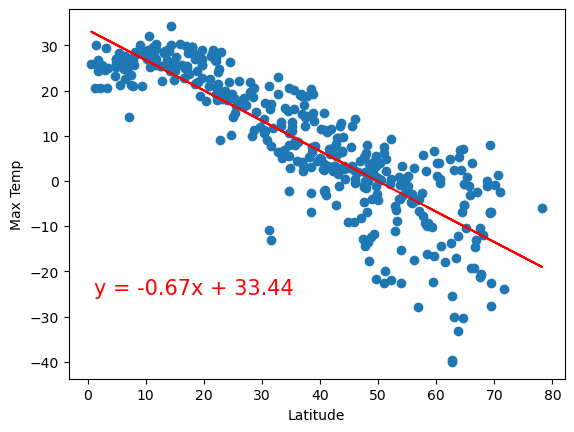

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,-25),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

The r-value is: 0.5850513828453819


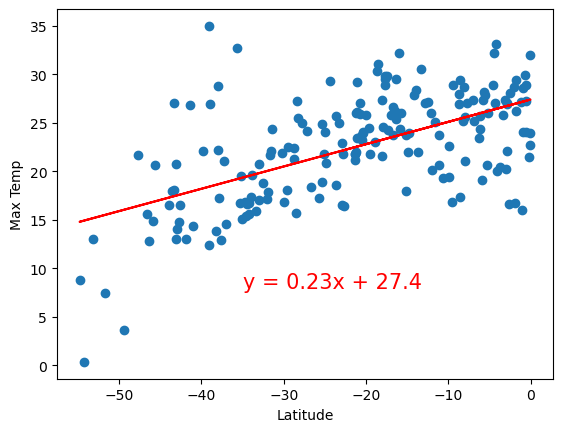

In [64]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,8),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere plot the r value (-0.8629011177498824) is approaching -1 indicating a negative correlation between Latitude and Temp. The value is close enough to -1 to be considered strong indicating that as latitude increases in the northern hemisphere the temperature is going to decrease. 
In the souther hemisphere plot the r value (0.5850513828453819) is a little over halfway between 0 and 1 indicating a positive correlation between Latitude and Temperature. The value is above .5 giving a significant indication that as Latitude increases in the southern hempisphere the temperature also increases. 
The negative correlation is the northern hemisphere is stronger than the positive correlation in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23582158796145702


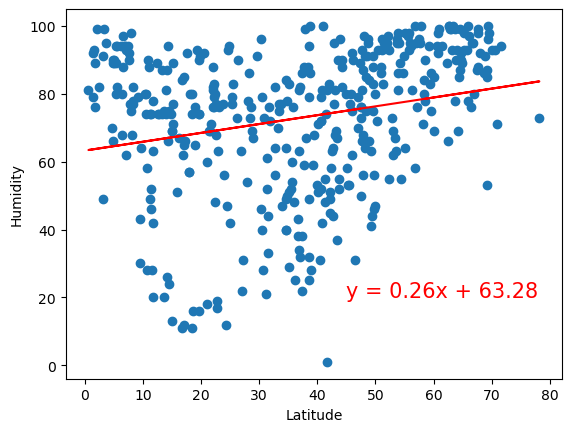

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

The r-value is: 0.31616007298857385


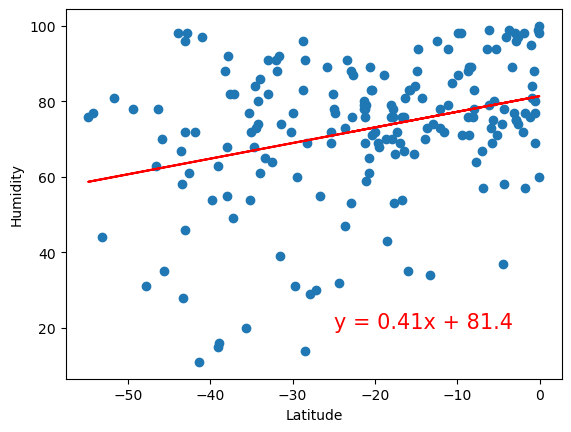

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere plot the r value (0.23582158796145702) is closer to 0 than it is 1 when looking at Latitude and Humidity. This would indicate there is very little positive correlation and that this plot leans more towards having no linear correlation. The plot is showing that as Latitude increases there is a small indication that Humidity increases as well in the northern hemisphere.
In the souther hemisphere plot the r value (0.31616007298857385) is closer to 0 than it is 1 when looking at Latitude and Humidity. This would indicate there is very little positive correlation, and this plot leans more towards having no linear correlation. The plot is showing that as Latitude increases there is a small indication that Humidity increases as well.
Based on the r value of both hemispheres the positive correlation is the southern hemisphere is stronger than the positive correlation in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1380519105974174


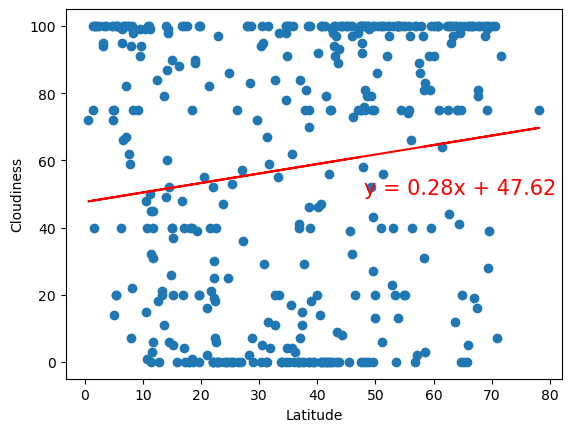

In [75]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,50),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

The r-value is: 0.19411782863324353


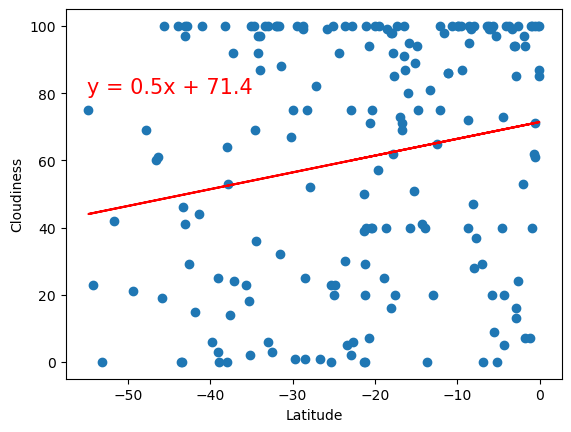

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere plot the r value (0.23582158796145702) is closer to 0 than it is 1 when looking at Latitude and Cloudiness. This would indicate there is very little positive correlation and that this plot leans more towards having no linear correlation. The plot is showing that as Latitude increases there is a small indication that Cloudiness increases as well in the northern hemisphere.
In the souther hemisphere plot the r value (0.31616007298857385) is closer to 0 than it is 1 when looking at Latitude and Cloudiness. This would indicate there is very little positive correlation, and this plot leans more towards having no linear correlation. The plot is showing that as Latitude increases there is a small indication that Humidity increases as well.
Based on the r value of both hemispheres the positive correlation is the southern hemisphere is stronger than the positive correlation in the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08920672890928978


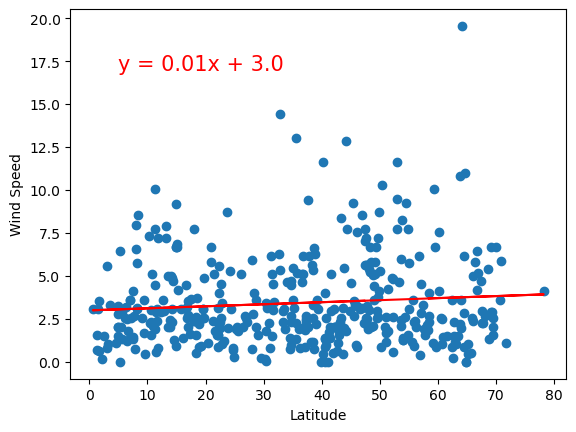

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,17),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

The r-value is: -0.3390404475978839


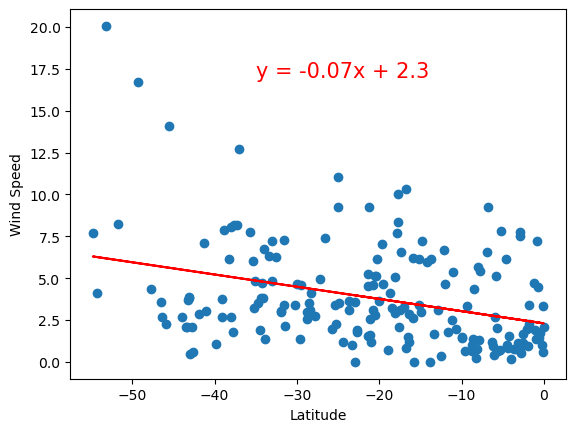

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)
# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,17),fontsize=15,color="red")
# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Print r square value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere plot the r value (0.08920672890928978) is very close to 0 indicating no linear correlation between Latitude and Wind Speed. This would be considered positive correlation as it's greater than 0, but it's so close to 0 that we can there is a minute positive correlation between Latitude and Wind Speed. As latitude there is a neglible increase in wind speed  
In the southern hemisphere plot the r value (-0.3390404475978839) is closer to 0 than -1 indicating a small negative correlation between Latitude and Wind Speed. The value is below -.5 which doesn't give a significant negative correlation between latitude and wind speed. As wind speed increases we are seeing a small decrease in wind speed.
The negative correlation is the southern hemisphere is much stronger than the positive correlation in the northern hemisphere.